In [ ]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import random

In [ ]:
from google.colab import files
import os

# Upload your zip file
uploaded = files.upload()

# The uploaded file will be in the current directory
print("Uploaded files:", list(uploaded.keys()))

Saving kaggle.json to kaggle.json
Uploaded files: ['kaggle.json']


In [ ]:
DATASET_ZIP = 'leaf-images.zip'
TARGET_SIZE = (224, 224)
current_dir = os.getcwd()
RAW_DIR = os.path.join(current_dir, "content", "data", "raw")
CLEAN_DIR = os.path.join(current_dir, "content", "data", "clean")

In [ ]:
from google.colab import files
import shutil

uploaded = files.upload()
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

Saving kaggle.json to kaggle (1).json


In [ ]:
from pathlib import Path
if not os.path.exists(str(Path.home() / '.kaggle/kaggle.json')):
    print("Please upload your kaggle.json to ~/.kaggle/")
else:
    os.chmod(str(Path.home() / '.kaggle/kaggle.json'), 0o600)

In [ ]:
!kaggle datasets download -d ichhadhari/leaf-images -p {RAW_DIR}

Dataset URL: https://www.kaggle.com/datasets/ichhadhari/leaf-images
License(s): copyright-authors
100% 5.28G/5.29G [00:56<00:00, 30.1MB/s]
100% 5.29G/5.29G [00:56<00:00, 101MB/s] 


In [ ]:
import zipfile
with zipfile.ZipFile(os.path.join(RAW_DIR, DATASET_ZIP), 'r') as zip_ref:
    zip_ref.extractall(RAW_DIR)

In [ ]:
# INPUT_IMG_DIR = os.path.join(RAW_DIR, 'leaf-images')
INPUT_IMG_DIR = os.path.join(RAW_DIR, '300_dataset')
os.makedirs(CLEAN_DIR, exist_ok=True)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

img_files = []
for root, dirs, files in os.walk(INPUT_IMG_DIR):
    for file in files:
        if file.lower().endswith(image_extensions):
            img_files.append(os.path.join(root, file))

print(f"Found {len(img_files)} images")

for idx, img_path in tqdm(enumerate(img_files), total=len(img_files)):
    try:
        img = Image.open(img_path).convert("RGB")
        img_resized = img.resize(TARGET_SIZE)
        clean_filename = f"img_{idx:04d}.png"
        img_resized.save(os.path.join(CLEAN_DIR, clean_filename))
    except Exception as e:
        print(f"❌ Failed to process {img_path}: {e}")

print(f"\nNormalized and saved {len(img_files)} images to: {CLEAN_DIR}")

Found 3003 images


  3%|▎         | 94/3003 [00:14<07:26,  6.51it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Vilayati Chinch/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Vilayati Chinch/301.jpg'


 53%|█████▎    | 1598/3003 [04:06<02:22,  9.87it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Sonmohar/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Sonmohar/301.jpg'


 83%|████████▎ | 2496/3003 [06:24<01:11,  7.05it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Vad/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Vad/301.jpg'


100%|██████████| 3003/3003 [07:43<00:00,  6.48it/s]


Normalized and saved 3003 images to: /content/content/data/clean


In [ ]:
current_dir = os.getcwd()
CLEAN_DIR = os.path.join(current_dir, "content", "data", "clean")
NOISY_BASE_DIR = os.path.join(current_dir, "content", "data", "noisy")
os.makedirs(CLEAN_DIR, exist_ok=True)
os.makedirs(NOISY_BASE_DIR, exist_ok=True)

In [ ]:
import zipfile
import os

zip_filename = "processed_leaf_images_224.zip"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(CLEAN_DIR)

print(f"Extracted images to: {CLEAN_DIR}")

import glob
image_files = glob.glob(os.path.join(CLEAN_DIR, "*.png"))
print(f"Found {len(image_files)} images in clean directory")

In [ ]:
GAUSSIAN_DIR = os.path.join(NOISY_BASE_DIR, "gaussian")
SALT_PEPPER_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper")
POISSON_DIR = os.path.join(NOISY_BASE_DIR, "poisson")
SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "speckle")
UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "uniform")

In [ ]:
GAUSSIAN_SALT_PEPPER_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_salt_pepper")
GAUSSIAN_POISSON_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_poisson")
GAUSSIAN_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_speckle")
GAUSSIAN_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_uniform")
SALT_PEPPER_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_speckle")
SALT_PEPPER_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_uniform")
POISSON_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "poisson_speckle")
POISSON_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "poisson_uniform")
SPECKLE_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "speckle_uniform")

In [ ]:
GAUSSIAN_SALT_PEPPER_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_salt_pepper_speckle")
GAUSSIAN_POISSON_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_poisson_uniform")
SALT_PEPPER_SPECKLE_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_speckle_uniform")

In [ ]:
noise_dirs = [
    GAUSSIAN_DIR, SALT_PEPPER_DIR, POISSON_DIR, SPECKLE_DIR, UNIFORM_DIR,
    GAUSSIAN_SALT_PEPPER_DIR, GAUSSIAN_POISSON_DIR, GAUSSIAN_SPECKLE_DIR, GAUSSIAN_UNIFORM_DIR,
    SALT_PEPPER_SPECKLE_DIR, SALT_PEPPER_UNIFORM_DIR, POISSON_SPECKLE_DIR, POISSON_UNIFORM_DIR,
    SPECKLE_UNIFORM_DIR, GAUSSIAN_SALT_PEPPER_SPECKLE_DIR, GAUSSIAN_POISSON_UNIFORM_DIR,
    SALT_PEPPER_SPECKLE_UNIFORM_DIR
]

In [ ]:
for dir_path in noise_dirs:
    os.makedirs(dir_path, exist_ok=True)


In [ ]:
def add_gaussian_noise(image_array, mean=0, std=25):
    """Add Gaussian noise to image"""
    noise = np.random.normal(mean, std, image_array.shape)
    noisy_image = image_array + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image_array, salt_prob=0.05, pepper_prob=0.05):
    """Add salt and pepper noise to image"""
    noisy_image = image_array.copy()

    # Salt noise (white pixels)
    salt_mask = np.random.random(image_array.shape[:2]) < salt_prob
    noisy_image[salt_mask] = 255

    # Pepper noise (black pixels)
    pepper_mask = np.random.random(image_array.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = 0

    return noisy_image

def add_poisson_noise(image_array):
    """Add Poisson noise to image"""
    # Convert to float, add poisson noise, then convert back
    image_float = image_array.astype(np.float32)
    noisy_image = np.random.poisson(image_float / 255.0 * 50) / 50.0 * 255.0
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_speckle_noise(image_array, variance=0.1):
    """Add speckle noise to image"""
    noise = np.random.normal(0, variance, image_array.shape)
    noisy_image = image_array + image_array * noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_uniform_noise(image_array, low=-20, high=20):
    """Add uniform noise to image"""
    noise = np.random.uniform(low, high, image_array.shape)
    noisy_image = image_array + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


In [ ]:
def process_images_with_noise():
    """Process all clean images and add different types of noise"""

    # Get all clean images
    clean_images = [f for f in os.listdir(CLEAN_DIR) if f.endswith('.png')]
    print(f"Found {len(clean_images)} clean images to process")

    for img_name in tqdm(clean_images, desc="Processing images"):
        img_path = os.path.join(CLEAN_DIR, img_name)

        try:
            # Load image
            img = Image.open(img_path).convert("RGB")
            img_array = np.array(img)

            # Apply individual noise types
            gaussian_noisy = add_gaussian_noise(img_array)
            salt_pepper_noisy = add_salt_pepper_noise(img_array)
            poisson_noisy = add_poisson_noise(img_array)
            speckle_noisy = add_speckle_noise(img_array)
            uniform_noisy = add_uniform_noise(img_array)

            # Apply combination noise types
            gaussian_salt_pepper = add_salt_pepper_noise(add_gaussian_noise(img_array))
            gaussian_poisson = add_poisson_noise(add_gaussian_noise(img_array))
            gaussian_speckle = add_speckle_noise(add_gaussian_noise(img_array))
            gaussian_uniform = add_uniform_noise(add_gaussian_noise(img_array))
            salt_pepper_speckle = add_speckle_noise(add_salt_pepper_noise(img_array))
            salt_pepper_uniform = add_uniform_noise(add_salt_pepper_noise(img_array))
            poisson_speckle = add_speckle_noise(add_poisson_noise(img_array))
            poisson_uniform = add_uniform_noise(add_poisson_noise(img_array))
            speckle_uniform = add_uniform_noise(add_speckle_noise(img_array))

            # Apply triple combinations
            gaussian_salt_pepper_speckle = add_speckle_noise(add_salt_pepper_noise(add_gaussian_noise(img_array)))
            gaussian_poisson_uniform = add_uniform_noise(add_poisson_noise(add_gaussian_noise(img_array)))
            salt_pepper_speckle_uniform = add_uniform_noise(add_speckle_noise(add_salt_pepper_noise(img_array)))

            # Save individual noise types
            Image.fromarray(gaussian_noisy).save(os.path.join(GAUSSIAN_DIR, img_name))
            Image.fromarray(salt_pepper_noisy).save(os.path.join(SALT_PEPPER_DIR, img_name))
            Image.fromarray(poisson_noisy).save(os.path.join(POISSON_DIR, img_name))
            Image.fromarray(speckle_noisy).save(os.path.join(SPECKLE_DIR, img_name))
            Image.fromarray(uniform_noisy).save(os.path.join(UNIFORM_DIR, img_name))

            # Save combination noise types
            Image.fromarray(gaussian_salt_pepper).save(os.path.join(GAUSSIAN_SALT_PEPPER_DIR, img_name))
            Image.fromarray(gaussian_poisson).save(os.path.join(GAUSSIAN_POISSON_DIR, img_name))
            Image.fromarray(gaussian_speckle).save(os.path.join(GAUSSIAN_SPECKLE_DIR, img_name))
            Image.fromarray(gaussian_uniform).save(os.path.join(GAUSSIAN_UNIFORM_DIR, img_name))
            Image.fromarray(salt_pepper_speckle).save(os.path.join(SALT_PEPPER_SPECKLE_DIR, img_name))
            Image.fromarray(salt_pepper_uniform).save(os.path.join(SALT_PEPPER_UNIFORM_DIR, img_name))
            Image.fromarray(poisson_speckle).save(os.path.join(POISSON_SPECKLE_DIR, img_name))
            Image.fromarray(poisson_uniform).save(os.path.join(POISSON_UNIFORM_DIR, img_name))
            Image.fromarray(speckle_uniform).save(os.path.join(SPECKLE_UNIFORM_DIR, img_name))

            # Save triple combinations
            Image.fromarray(gaussian_salt_pepper_speckle).save(os.path.join(GAUSSIAN_SALT_PEPPER_SPECKLE_DIR, img_name))
            Image.fromarray(gaussian_poisson_uniform).save(os.path.join(GAUSSIAN_POISSON_UNIFORM_DIR, img_name))
            Image.fromarray(salt_pepper_speckle_uniform).save(os.path.join(SALT_PEPPER_SPECKLE_UNIFORM_DIR, img_name))

        except Exception as e:
            print(f"Failed to process {img_name}: {e}")

    print(f"\n----Noise addition completed!")
    print(f"Clean images: {len(clean_images)}")
    print(f"Noise directories created: {len(noise_dirs)}")
    print(f"Total noisy images generated: {len(clean_images) * len(noise_dirs)}")

In [ ]:
process_images_with_noise()

Found 3000 clean images to process


Processing images: 100%|██████████| 3000/3000 [18:21<00:00,  2.72it/s]


----Noise addition completed!
Clean images: 3000
Noise directories created: 17
Total noisy images generated: 51000


In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import time
import warnings
warnings.filterwarnings('ignore')

# Deep Learning imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import ResNet18_Weights
import torch.nn.functional as F

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import os
import glob
import numpy as np
from PIL import Image

current_dir = os.getcwd()
NOISY_BASE_DIR = os.path.join(current_dir, "content", "data", "noisy")

def load_images_and_labels_from_noise_dirs(base_dir, expected_shape=(224, 224, 3), max_images_per_dir=2500):
    """Load up to `max_images_per_dir` images per noise type and label by directory name"""
    images = []
    labels = []

    for noise_label in os.listdir(base_dir):
        noise_dir = os.path.join(base_dir, noise_label)
        if not os.path.isdir(noise_dir):
            continue

        image_files = glob.glob(os.path.join(noise_dir, "*.png"))
        image_files = image_files[:max_images_per_dir]  # Limit number of images

        print(f"Loading {len(image_files)} images from {noise_label}")

        for img_path in image_files:
            try:
                img = Image.open(img_path).convert('RGB')
                img_array = np.array(img)

                if img_array.shape != expected_shape:
                    # print(f"Skipping {img_path} due to unexpected shape: {img_array.shape}")
                    continue

                images.append(img_array)
                labels.append(noise_label)

            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load all noisy images with a cap per directory
X, y = load_images_and_labels_from_noise_dirs(NOISY_BASE_DIR, max_images_per_dir=1000)

print(f"Total images loaded: {len(X)}")
print(f"Image shape: {X[0].shape}")
print(f"Unique labels (noise types): {np.unique(y)}")



Loading 1000 images from gaussian_salt_pepper
Loading 1000 images from gaussian_speckle
Loading 1000 images from salt_pepper_uniform
Loading 1000 images from salt_pepper_speckle
Loading 1000 images from gaussian_poisson_uniform
Loading 1000 images from poisson_speckle
Loading 1000 images from uniform
Loading 1000 images from gaussian_poisson
Loading 1000 images from gaussian_uniform
Loading 1000 images from gaussian
Loading 1000 images from speckle_uniform
Loading 1000 images from gaussian_salt_pepper_speckle
Loading 1000 images from salt_pepper_speckle_uniform
Loading 1000 images from salt_pepper
Loading 1000 images from poisson_uniform
Loading 1000 images from speckle
Loading 1000 images from poisson
Total images loaded: 17000
Image shape: (224, 224, 3)
Unique labels (noise types): ['gaussian' 'gaussian_poisson' 'gaussian_poisson_uniform'
 'gaussian_salt_pepper' 'gaussian_salt_pepper_speckle' 'gaussian_speckle'
 'gaussian_uniform' 'poisson' 'poisson_speckle' 'poisson_uniform'
 'salt_

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
def extract_features(images):
    """Extract features from images for ML classifiers"""
    features = []

    for img in images:
        # Flatten image
        flat_img = img.flatten()

        # Calculate basic statistics
        mean_rgb = np.mean(img, axis=(0, 1))
        std_rgb = np.std(img, axis=(0, 1))

        # Calculate histogram features
        hist_r = np.histogram(img[:,:,0], bins=32, range=(0, 255))[0]
        hist_g = np.histogram(img[:,:,1], bins=32, range=(0, 255))[0]
        hist_b = np.histogram(img[:,:,2], bins=32, range=(0, 255))[0]

        # Combine features
        feature_vector = np.concatenate([
            mean_rgb, std_rgb, hist_r, hist_g, hist_b
        ])

        features.append(feature_vector)

    return np.array(features)

print("Extracting features for ML classifiers...")
X_features = extract_features(X)



Extracting features for ML classifiers...


In [ ]:
# Apply PCA to reduce dimensionality
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_features)

print(f"Original feature shape: {X_features.shape}")
print(f"PCA feature shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_[:5]}")

Applying PCA for dimensionality reduction...
Original feature shape: (17000, 102)
PCA feature shape: (17000, 50)
Explained variance ratio: [0.28208188 0.23485474 0.10490831 0.07763372 0.03964893]


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Training set: (13600, 50)
Test set: (3400, 50)


In [ ]:
classifiers = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
}

ml_results = {}

for name, clf in classifiers.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    start_time = time.time()

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    training_time = time.time() - start_time

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

    # Store results
    ml_results[name] = {
        'accuracy': accuracy,
        'training_time': training_time,
        'predictions': y_pred
    }

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred,
                              target_names=label_encoder.classes_))



Training SVM...
SVM Accuracy: 0.7544
Training time: 11.27 seconds

Classification Report for SVM:
                              precision    recall  f1-score   support

                    gaussian       0.48      0.55      0.51       200
            gaussian_poisson       0.90      0.94      0.92       200
    gaussian_poisson_uniform       0.76      0.82      0.79       200
        gaussian_salt_pepper       0.93      0.96      0.95       200
gaussian_salt_pepper_speckle       0.89      0.95      0.92       200
            gaussian_speckle       0.64      0.69      0.66       200
            gaussian_uniform       0.62      0.62      0.62       200
                     poisson       0.93      0.85      0.89       200
             poisson_speckle       0.89      0.91      0.90       200
             poisson_uniform       0.78      0.79      0.78       200
                 salt_pepper       0.81      0.90      0.85       200
         salt_pepper_speckle       0.83      0.73      0.78 

In [ ]:
import joblib
for name, clf in classifiers.items():
    # Save the trained model
    model_path = f"{name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(clf, model_path)
    print(f"✔️ Saved {name} model to {model_path}")


✔️ Saved SVM model to svm_model.joblib
✔️ Saved Decision Tree model to decision_tree_model.joblib
✔️ Saved Logistic Regression model to logistic_regression_model.joblib
✔️ Saved Random Forest model to random_forest_model.joblib


In [ ]:
class LeafDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        # return image, label
        return image, torch.tensor(label, dtype=torch.long)

# Define transforms
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Split data for deep learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create datasets
train_dataset = LeafDataset(X_train_dl, y_train_dl, transform=train_transform)
test_dataset = LeafDataset(X_test_dl, y_test_dl, transform=test_transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")


Training batches: 425
Test batches: 107


In [ ]:
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Freeze early layers (keep only last few layers trainable)
for param in model.parameters():
    param.requires_grad = False

# Unfreeze last 2 layers
for param in model.layer4.parameters():
    param.requires_grad = True

# Replace classifier
num_classes = len(np.unique(y_encoded))
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
model = model.to(device)

print(f"Model moved to: {device}")
print(f"Number of classes: {num_classes}")

# Count trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())

print(f"Trainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")
print(f"Percentage trainable: {100 * trainable_params / total_params:.2f}%")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 159MB/s]


Model moved to: cuda
Number of classes: 17
Trainable parameters: 8,402,449
Total parameters: 11,185,233
Percentage trainable: 75.12%


In [ ]:
def train_model(model, train_loader, test_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    print(f"\n{'='*60}")
    print(f"Starting Transfer Learning Training")
    print(f"{'='*60}")

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train

        # Validation phase
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test

        # Store metrics
        train_losses.append(epoch_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print progress
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Loss: {epoch_loss:.4f} | "
              f"Train Acc: {train_accuracy:.2f}% | "
              f"Test Acc: {test_accuracy:.2f}% | "
              f"LR: {scheduler.get_last_lr()[0]:.6f}")

        scheduler.step()

    return train_losses, train_accuracies, test_accuracies


In [ ]:
train_losses, train_accuracies, test_accuracies = train_model(
    model, train_loader, test_loader, num_epochs=15, learning_rate=0.001
)


Starting Transfer Learning Training
Epoch [1/15] | Loss: 1.4271 | Train Acc: 41.65% | Test Acc: 56.40% | LR: 0.001000
Epoch [2/15] | Loss: 1.1607 | Train Acc: 51.24% | Test Acc: 59.76% | LR: 0.001000
Epoch [3/15] | Loss: 1.0633 | Train Acc: 55.05% | Test Acc: 60.44% | LR: 0.001000
Epoch [4/15] | Loss: 1.0067 | Train Acc: 57.24% | Test Acc: 58.32% | LR: 0.001000
Epoch [5/15] | Loss: 0.9532 | Train Acc: 59.13% | Test Acc: 68.61% | LR: 0.001000
Epoch [6/15] | Loss: 0.9151 | Train Acc: 60.22% | Test Acc: 68.08% | LR: 0.001000
Epoch [7/15] | Loss: 0.9029 | Train Acc: 61.67% | Test Acc: 68.94% | LR: 0.001000
Epoch [8/15] | Loss: 0.7551 | Train Acc: 67.47% | Test Acc: 75.34% | LR: 0.000100
Epoch [9/15] | Loss: 0.7255 | Train Acc: 69.33% | Test Acc: 76.28% | LR: 0.000100
Epoch [10/15] | Loss: 0.7065 | Train Acc: 69.30% | Test Acc: 76.05% | LR: 0.000100
Epoch [11/15] | Loss: 0.7089 | Train Acc: 69.59% | Test Acc: 75.90% | LR: 0.000100
Epoch [12/15] | Loss: 0.6872 | Train Acc: 70.37% | Test Acc

In [ ]:
torch.save(model.state_dict(), "cnn_leaf_model.pth")

In [ ]:
from google.colab import files
files.download("cnn_leaf_model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Subplot 1: CNN Training Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.title('CNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: CNN Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'r-', label='Test Accuracy')
plt.title('CNN Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
print(f"\n{'='*60}")
print("FINAL RESULTS SUMMARY")
print(f"{'='*60}")

print("\nMachine Learning Classifiers:")
print("-" * 40)
for name, results in ml_results.items():
    print(f"{name:20}: {results['accuracy']:.4f} ({results['training_time']:.2f}s)")

print(f"\nTransfer Learning (ResNet18):")
print("-" * 40)
final_test_accuracy = test_accuracies[-1]
print(f"{'Final Test Accuracy':20}: {final_test_accuracy:.2f}%")

print(f"\nBest performing model:")
best_ml = max(ml_results, key=lambda x: ml_results[x]['accuracy'])
best_ml_acc = ml_results[best_ml]['accuracy']

if final_test_accuracy/100 > best_ml_acc:
    print(f"Transfer Learning ResNet18: {final_test_accuracy:.2f}%")
else:
    print(f"{best_ml}: {best_ml_acc:.4f}")

In [ ]:
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Transfer Learning ResNet18')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from test loader
model.eval()
inputs, labels = next(iter(test_loader))
inputs, labels = inputs.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Move data to CPU for visualization
inputs = inputs.cpu()
labels = labels.cpu()
preds = preds.cpu()

# Denormalize images for display
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

def denormalize(img):
    img = img.permute(1, 2, 0)  # CxHxW → HxWxC
    img = img * std + mean
    return torch.clamp(img, 0, 1).numpy()

# Show N images
N = 8
plt.figure(figsize=(15, 5))
for i in range(N):
    plt.subplot(2, N//2, i+1)
    img = denormalize(inputs[i])
    plt.imshow(img)
    plt.title(f"True: {label_encoder.classes_[labels[i]]}\nPred: {label_encoder.classes_[preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
class CNNModel64_Reduced(nn.Module):
    def __init__(self):
        super(CNNModel64_Reduced, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(128, 180, kernel_size=3, padding=1)
        self.bn5   = nn.BatchNorm2d(180)
        self.conv6 = nn.Conv2d(180, 256, kernel_size=3, padding=1)
        self.bn6   = nn.BatchNorm2d(256)

        self.pool_extra = nn.MaxPool2d(2)
        self.pool_final = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 17) # Corrected output size to 17

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.max_pool2d(x, 2)

        x = self.pool_extra(x)
        x = self.pool_final(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(X[0].shape)
inputs, labels = next(iter(train_loader))
print(inputs.shape)

Using device: cuda
(224, 224, 3)
torch.Size([32, 3, 224, 224])


In [ ]:
print("Unique labels in y_train_dl:", np.unique(y_train_dl))
print("Unique labels in y_test_dl:", np.unique(y_test_dl))
model = CNNModel64_Reduced().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Unique labels in y_train_dl: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Unique labels in y_test_dl: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
num_epochs = 30  # change as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f} - Accuracy: {train_acc:.4f}")


Epoch 1/30: 100%|██████████| 424/424 [04:15<00:00,  1.66it/s]


Epoch [1/30] - Loss: 651.5493 - Accuracy: 0.3787


Epoch 2/30:  17%|█▋        | 71/424 [00:41<03:24,  1.72it/s]


KeyboardInterrupt: 

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Freeze all parameters first
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last residual block
for param in model.layer4.parameters():
    param.requires_grad = True

# Replace the final fully connected layer with your output classes
model.fc = nn.Linear(model.fc.in_features, 17)

# The new fc layer parameters should be learnable by default, but to be safe:
for param in model.fc.parameters():
    param.requires_grad = True

model_2 = model.to(device)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]


In [ ]:
train_losses, train_accuracies, test_accuracies = train_model(
    model_2, train_loader, test_loader, num_epochs=25, learning_rate=0.001
)


Starting Transfer Learning Training
Epoch [1/25] | Loss: 1.3828 | Train Acc: 43.37% | Test Acc: 58.03% | LR: 0.001000
Epoch [2/25] | Loss: 1.0343 | Train Acc: 55.99% | Test Acc: 62.18% | LR: 0.001000
Epoch [3/25] | Loss: 0.9096 | Train Acc: 60.98% | Test Acc: 71.38% | LR: 0.001000
Epoch [4/25] | Loss: 0.8411 | Train Acc: 64.32% | Test Acc: 74.18% | LR: 0.001000
Epoch [5/25] | Loss: 0.8248 | Train Acc: 64.40% | Test Acc: 75.47% | LR: 0.001000
Epoch [6/25] | Loss: 0.7781 | Train Acc: 66.15% | Test Acc: 68.82% | LR: 0.001000
Epoch [7/25] | Loss: 0.7570 | Train Acc: 66.73% | Test Acc: 76.26% | LR: 0.001000
Epoch [8/25] | Loss: 0.6377 | Train Acc: 72.74% | Test Acc: 79.62% | LR: 0.000100
Epoch [9/25] | Loss: 0.6057 | Train Acc: 74.59% | Test Acc: 79.41% | LR: 0.000100
Epoch [10/25] | Loss: 0.6003 | Train Acc: 74.25% | Test Acc: 80.53% | LR: 0.000100
Epoch [11/25] | Loss: 0.5810 | Train Acc: 74.70% | Test Acc: 81.15% | LR: 0.000100
Epoch [12/25] | Loss: 0.5595 | Train Acc: 75.85% | Test Acc

In [ ]:
torch.save(model_2.state_dict(), "resnet50_custom_17class.pth")
torch.save(model_2, "full_model.pth")
torch.save({
    'model_state_dict': model_2.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, "checkpoint.pth")


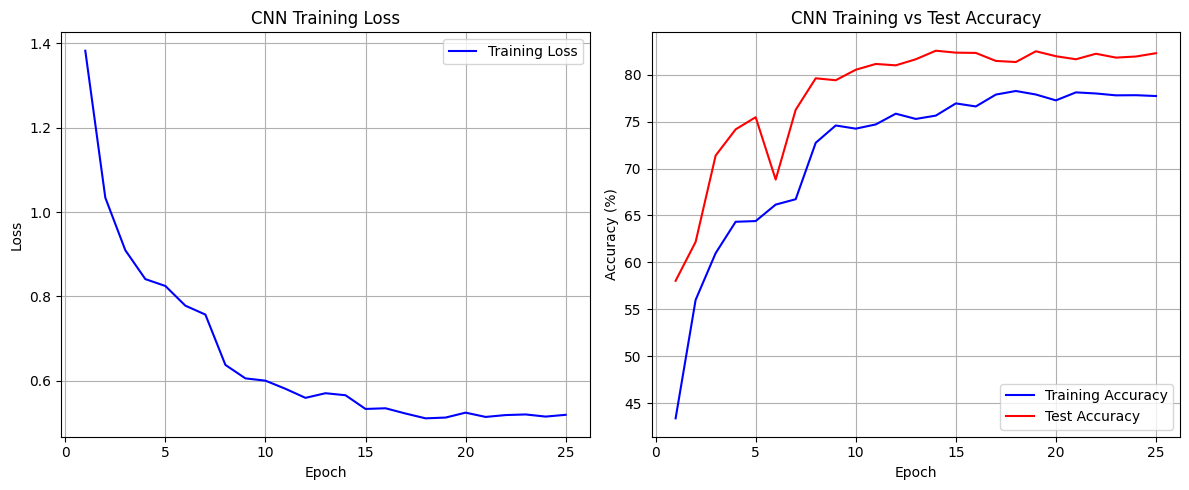

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Subplot 1: CNN Training Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.title('CNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: CNN Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'r-', label='Test Accuracy')
plt.title('CNN Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


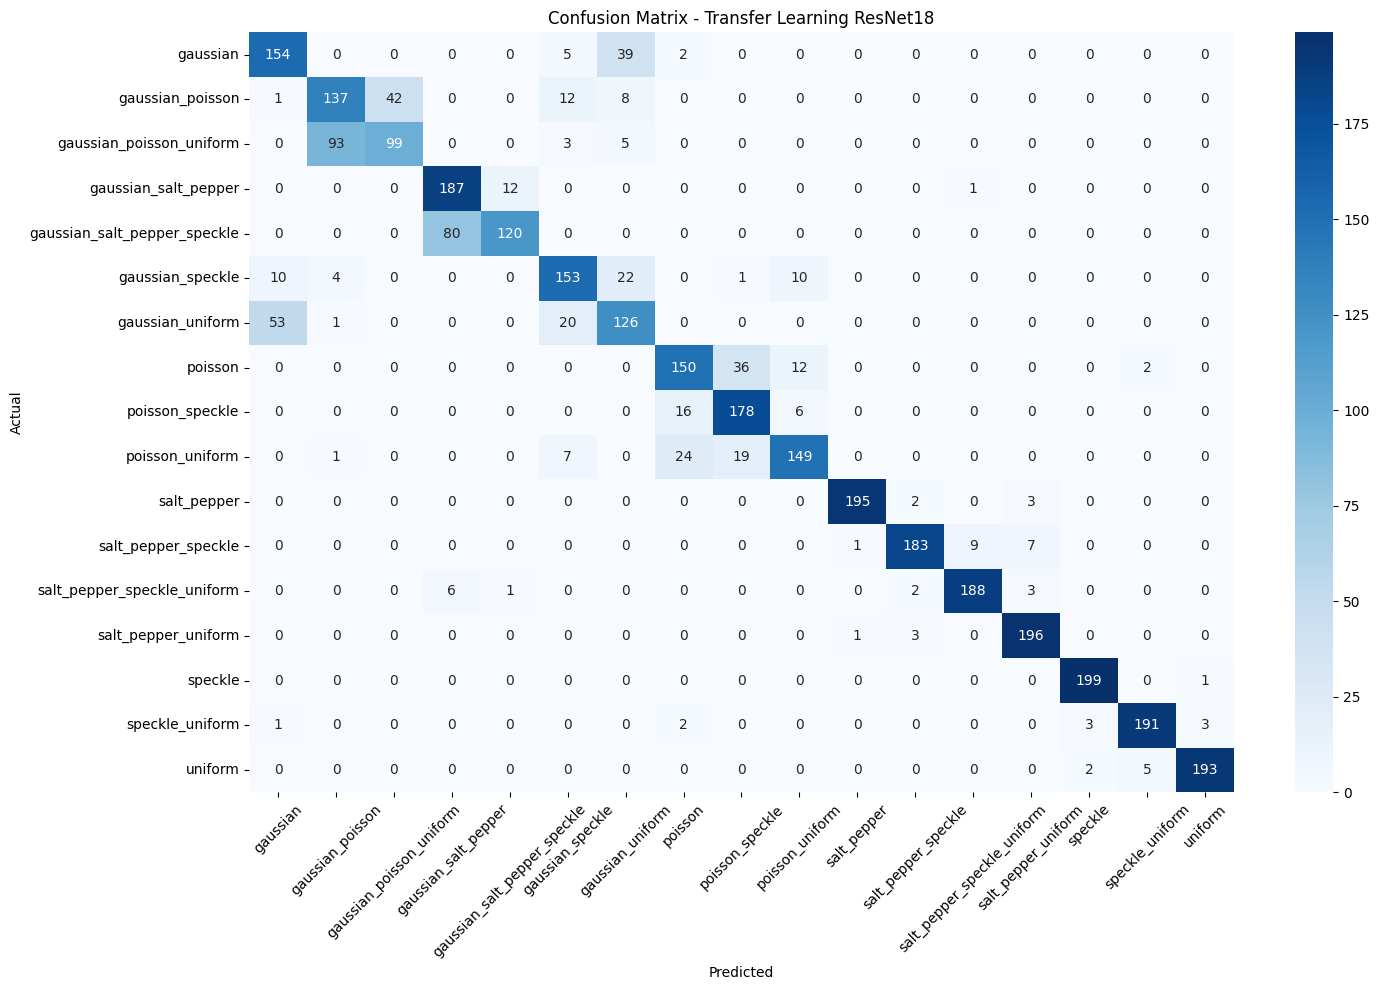

In [ ]:
model_2.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_2(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create confusion matrix
plt.figure(figsize=(15, 10))
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Transfer Learning ResNet18')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


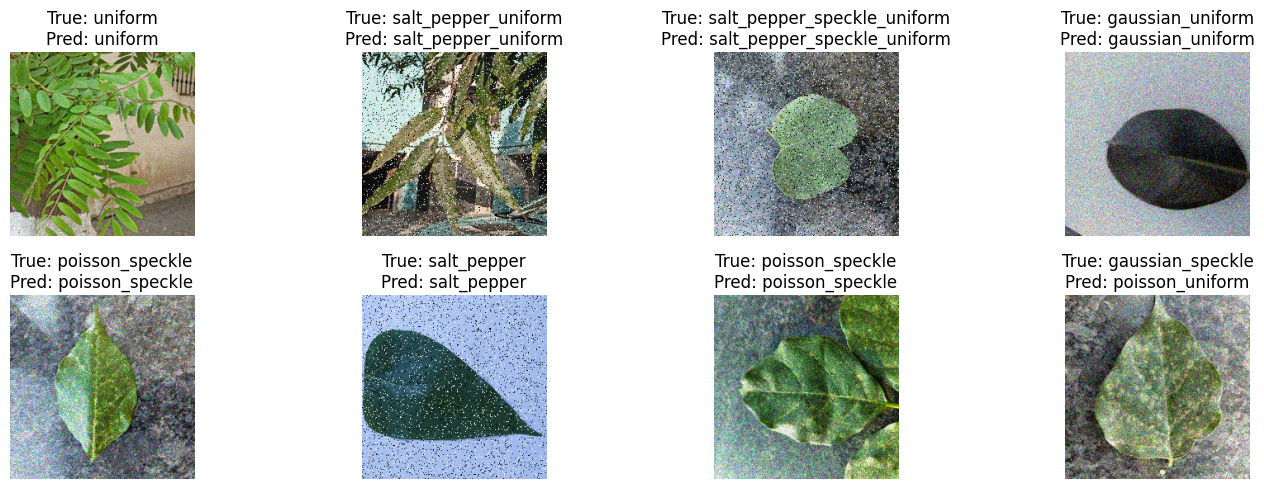

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from test loader
model.eval()
inputs, labels = next(iter(test_loader))
inputs, labels = inputs.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Move data to CPU for visualization
inputs = inputs.cpu()
labels = labels.cpu()
preds = preds.cpu()

# Denormalize images for display
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

def denormalize(img):
    img = img.permute(1, 2, 0)  # CxHxW → HxWxC
    img = img * std + mean
    return torch.clamp(img, 0, 1).numpy()

# Show N images
N = 8
plt.figure(figsize=(15, 5))
for i in range(N):
    plt.subplot(2, N//2, i+1)
    img = denormalize(inputs[i])
    plt.imshow(img)
    plt.title(f"True: {label_encoder.classes_[labels[i]]}\nPred: {label_encoder.classes_[preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


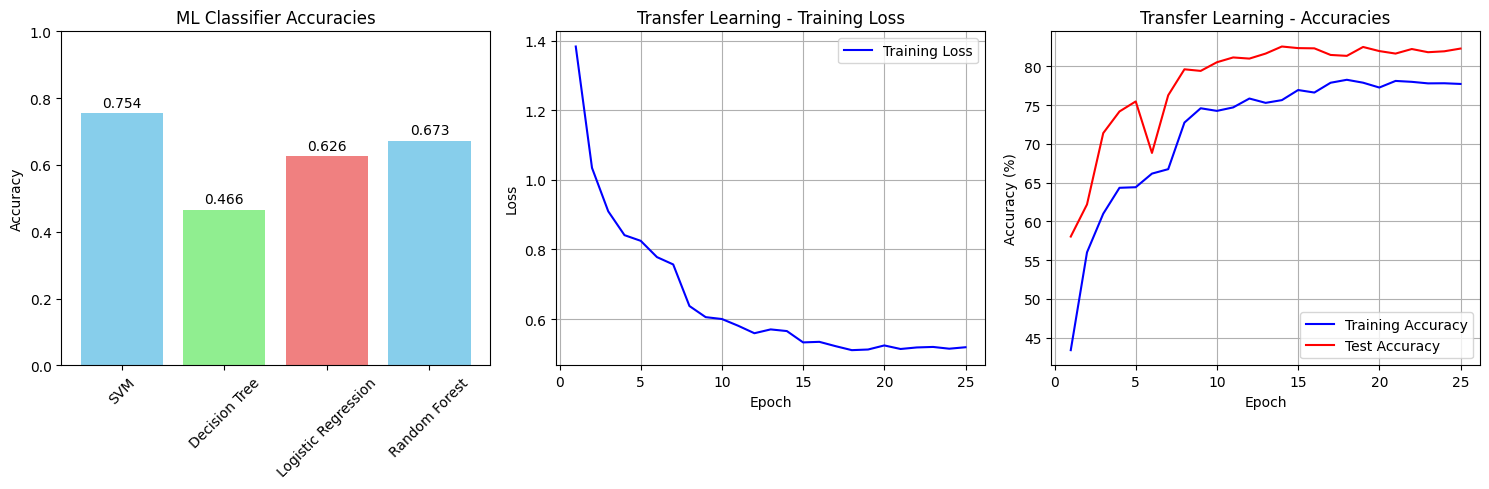

In [ ]:
# Plot ML classifier results
plt.figure(figsize=(15, 5))

# Subplot 1: ML Classifier Accuracies
plt.subplot(1, 3, 1)
names = list(ml_results.keys())
accuracies = [ml_results[name]['accuracy'] for name in names]
colors = ['skyblue', 'lightgreen', 'lightcoral']

bars = plt.bar(names, accuracies, color=colors)
plt.title('ML Classifier Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 2: Transfer Learning Training Progress
plt.subplot(1, 3, 2)
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.title('Transfer Learning - Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 3: Transfer Learning Accuracies
plt.subplot(1, 3, 3)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'r-', label='Test Accuracy')
plt.title('Transfer Learning - Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

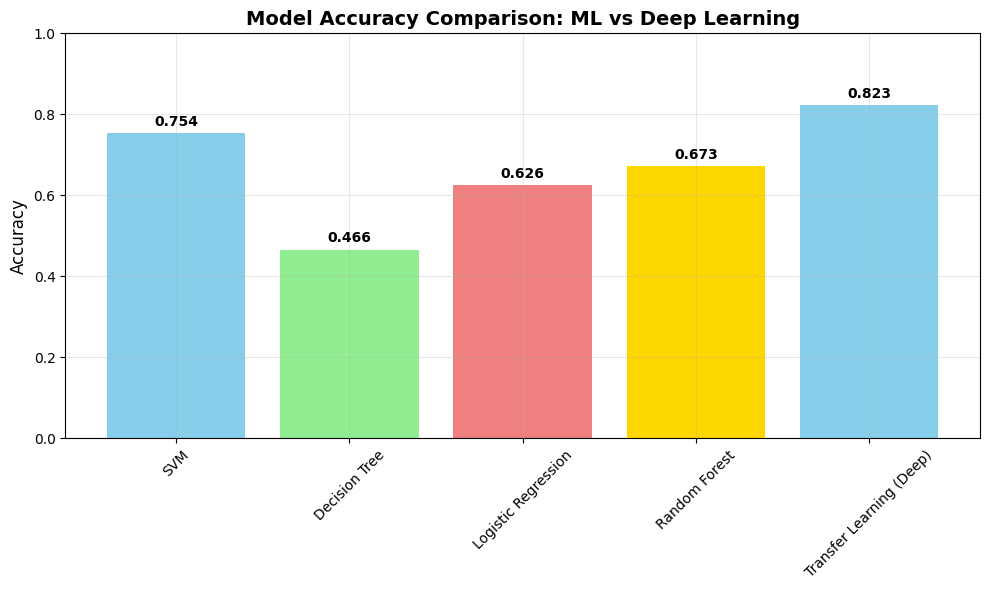

In [ ]:
# Combined plot comparing ML and Deep Learning accuracies
plt.figure(figsize=(10, 6))

# Prepare data for comparison
ml_names = list(ml_results.keys())
ml_accuracies = [ml_results[name]['accuracy'] for name in ml_names]

# Get final transfer learning accuracy (last epoch test accuracy)
final_dl_accuracy = test_accuracies[-1] / 100  # Convert from percentage to decimal if needed

# Create comprehensive comparison
all_model_names = ml_names + ['Transfer Learning (Deep)']
all_accuracies = ml_accuracies + [final_dl_accuracy]

# Create the comparison plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
bars = plt.bar(all_model_names, all_accuracies, color=colors)
plt.title('Model Accuracy Comparison: ML vs Deep Learning', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, all_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Generative models

In [6]:
current_dir = os.getcwd()
NOISY_BASE_DIR = os.path.join(current_dir, "content", "data", "noisy")
os.makedirs(NOISY_BASE_DIR, exist_ok=True)

In [7]:
GAUSSIAN_DIR = os.path.join(NOISY_BASE_DIR, "gaussian")
SALT_PEPPER_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper")
POISSON_DIR = os.path.join(NOISY_BASE_DIR, "poisson")
SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "speckle")
UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "uniform")
GAUSSIAN_SALT_PEPPER_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_salt_pepper")
GAUSSIAN_POISSON_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_poisson")
GAUSSIAN_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_speckle")
GAUSSIAN_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_uniform")
SALT_PEPPER_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_speckle")
SALT_PEPPER_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_uniform")
POISSON_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "poisson_speckle")
POISSON_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "poisson_uniform")
SPECKLE_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "speckle_uniform")
GAUSSIAN_SALT_PEPPER_SPECKLE_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_salt_pepper_speckle")
GAUSSIAN_POISSON_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "gaussian_poisson_uniform")
SALT_PEPPER_SPECKLE_UNIFORM_DIR = os.path.join(NOISY_BASE_DIR, "salt_pepper_speckle_uniform")

In [8]:
noise_dirs = [
    GAUSSIAN_DIR, SALT_PEPPER_DIR, POISSON_DIR, SPECKLE_DIR, UNIFORM_DIR,
    GAUSSIAN_SALT_PEPPER_DIR, GAUSSIAN_POISSON_DIR, GAUSSIAN_SPECKLE_DIR, GAUSSIAN_UNIFORM_DIR,
    SALT_PEPPER_SPECKLE_DIR, SALT_PEPPER_UNIFORM_DIR, POISSON_SPECKLE_DIR, POISSON_UNIFORM_DIR,
    SPECKLE_UNIFORM_DIR, GAUSSIAN_SALT_PEPPER_SPECKLE_DIR, GAUSSIAN_POISSON_UNIFORM_DIR,
    SALT_PEPPER_SPECKLE_UNIFORM_DIR
]

In [9]:
for dir_path in noise_dirs:
    os.makedirs(dir_path, exist_ok=True)


In [10]:
DATASET_ZIP = 'leaf-images.zip'
TARGET_SIZE = (224, 224)
current_dir = os.getcwd()
RAW_DIR = os.path.join(current_dir, "content", "data", "raw")
CLEAN_DIR = os.path.join(current_dir, "content", "data", "clean")

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(CLEAN_DIR, exist_ok=True)

print("Raw directory:", RAW_DIR)
print("Clean directory:", CLEAN_DIR)

Raw directory: /content/content/data/raw
Clean directory: /content/content/data/clean


In [11]:
from google.colab import files
import shutil

uploaded = files.upload()
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

Saving kaggle.json to kaggle.json


In [12]:
from pathlib import Path
if not os.path.exists(str(Path.home() / '.kaggle/kaggle.json')):
    print("Please upload your kaggle.json to ~/.kaggle/")
else:
    os.chmod(str(Path.home() / '.kaggle/kaggle.json'), 0o600)

In [13]:
!kaggle datasets download -d ichhadhari/leaf-images -p {RAW_DIR}

Dataset URL: https://www.kaggle.com/datasets/ichhadhari/leaf-images
License(s): copyright-authors
100% 5.29G/5.29G [01:10<00:00, 174MB/s]
100% 5.29G/5.29G [01:10<00:00, 80.5MB/s]


In [14]:
import zipfile
with zipfile.ZipFile(os.path.join(RAW_DIR, DATASET_ZIP), 'r') as zip_ref:
    zip_ref.extractall(RAW_DIR)

In [15]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import random

In [16]:
# INPUT_IMG_DIR = os.path.join(RAW_DIR, 'leaf-images')
INPUT_IMG_DIR = os.path.join(RAW_DIR, '300_dataset')
os.makedirs(CLEAN_DIR, exist_ok=True)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

img_files = []
for root, dirs, files in os.walk(INPUT_IMG_DIR):
    for file in files:
        if file.lower().endswith(image_extensions):
            img_files.append(os.path.join(root, file))

print(f"Found {len(img_files)} images")

for idx, img_path in tqdm(enumerate(img_files), total=len(img_files)):
    try:
        img = Image.open(img_path).convert("RGB")
        img_resized = img.resize(TARGET_SIZE)
        clean_filename = f"img_{idx:04d}.png"
        img_resized.save(os.path.join(CLEAN_DIR, clean_filename))
    except Exception as e:
        print(f"❌ Failed to process {img_path}: {e}")

print(f"\nNormalized and saved {len(img_files)} images to: {CLEAN_DIR}")

Found 3003 images


  4%|▎         | 107/3003 [00:18<07:51,  6.14it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Sonmohar/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Sonmohar/301.jpg'


 14%|█▎        | 408/3003 [01:08<06:18,  6.86it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Vad/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Vad/301.jpg'


 44%|████▎     | 1309/3003 [03:30<03:29,  8.10it/s]

❌ Failed to process /content/content/data/raw/300_dataset/Vilayati Chinch/301.jpg: cannot identify image file '/content/content/data/raw/300_dataset/Vilayati Chinch/301.jpg'


100%|██████████| 3003/3003 [08:00<00:00,  6.26it/s]


Normalized and saved 3003 images to: /content/content/data/clean


In [17]:
def add_gaussian_noise(image_array, mean=0, std=25):
    """Add Gaussian noise to image"""
    noise = np.random.normal(mean, std, image_array.shape)
    noisy_image = image_array + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image_array, salt_prob=0.05, pepper_prob=0.05):
    """Add salt and pepper noise to image"""
    noisy_image = image_array.copy()

    salt_mask = np.random.random(image_array.shape[:2]) < salt_prob
    noisy_image[salt_mask] = 255

    pepper_mask = np.random.random(image_array.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = 0

    return noisy_image

def add_poisson_noise(image_array):
    """Add Poisson noise to image"""
    image_float = image_array.astype(np.float32)
    noisy_image = np.random.poisson(image_float / 255.0 * 50) / 50.0 * 255.0
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_speckle_noise(image_array, variance=0.1):
    """Add speckle noise to image"""
    noise = np.random.normal(0, variance, image_array.shape)
    noisy_image = image_array + image_array * noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_uniform_noise(image_array, low=-20, high=20):
    """Add uniform noise to image"""
    noise = np.random.uniform(low, high, image_array.shape)
    noisy_image = image_array + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


In [19]:
def process_images_with_noise():
    """Process all clean images and add different types of noise"""

    clean_images = [f for f in os.listdir(CLEAN_DIR) if f.endswith('.png')]
    print(f"Found {len(clean_images)} clean images to process")

    clean_images = clean_images[:200]

    for img_name in tqdm(clean_images, desc="Processing images"):
        img_path = os.path.join(CLEAN_DIR, img_name)

        try:
            # Load image
            img = Image.open(img_path).convert("RGB")
            img_array = np.array(img)

            # Apply individual noise types
            gaussian_noisy = add_gaussian_noise(img_array)
            salt_pepper_noisy = add_salt_pepper_noise(img_array)
            poisson_noisy = add_poisson_noise(img_array)
            speckle_noisy = add_speckle_noise(img_array)
            uniform_noisy = add_uniform_noise(img_array)

            # Apply combination noise types
            gaussian_salt_pepper = add_salt_pepper_noise(add_gaussian_noise(img_array))
            gaussian_poisson = add_poisson_noise(add_gaussian_noise(img_array))
            gaussian_speckle = add_speckle_noise(add_gaussian_noise(img_array))
            gaussian_uniform = add_uniform_noise(add_gaussian_noise(img_array))
            salt_pepper_speckle = add_speckle_noise(add_salt_pepper_noise(img_array))
            salt_pepper_uniform = add_uniform_noise(add_salt_pepper_noise(img_array))
            poisson_speckle = add_speckle_noise(add_poisson_noise(img_array))
            poisson_uniform = add_uniform_noise(add_poisson_noise(img_array))
            speckle_uniform = add_uniform_noise(add_speckle_noise(img_array))

            # Apply triple combinations
            gaussian_salt_pepper_speckle = add_speckle_noise(add_salt_pepper_noise(add_gaussian_noise(img_array)))
            gaussian_poisson_uniform = add_uniform_noise(add_poisson_noise(add_gaussian_noise(img_array)))
            salt_pepper_speckle_uniform = add_uniform_noise(add_speckle_noise(add_salt_pepper_noise(img_array)))

            # Save individual noise types
            Image.fromarray(gaussian_noisy).save(os.path.join(GAUSSIAN_DIR, img_name))
            Image.fromarray(salt_pepper_noisy).save(os.path.join(SALT_PEPPER_DIR, img_name))
            Image.fromarray(poisson_noisy).save(os.path.join(POISSON_DIR, img_name))
            Image.fromarray(speckle_noisy).save(os.path.join(SPECKLE_DIR, img_name))
            Image.fromarray(uniform_noisy).save(os.path.join(UNIFORM_DIR, img_name))

            # Save combination noise types
            Image.fromarray(gaussian_salt_pepper).save(os.path.join(GAUSSIAN_SALT_PEPPER_DIR, img_name))
            Image.fromarray(gaussian_poisson).save(os.path.join(GAUSSIAN_POISSON_DIR, img_name))
            Image.fromarray(gaussian_speckle).save(os.path.join(GAUSSIAN_SPECKLE_DIR, img_name))
            Image.fromarray(gaussian_uniform).save(os.path.join(GAUSSIAN_UNIFORM_DIR, img_name))
            Image.fromarray(salt_pepper_speckle).save(os.path.join(SALT_PEPPER_SPECKLE_DIR, img_name))
            Image.fromarray(salt_pepper_uniform).save(os.path.join(SALT_PEPPER_UNIFORM_DIR, img_name))
            Image.fromarray(poisson_speckle).save(os.path.join(POISSON_SPECKLE_DIR, img_name))
            Image.fromarray(poisson_uniform).save(os.path.join(POISSON_UNIFORM_DIR, img_name))
            Image.fromarray(speckle_uniform).save(os.path.join(SPECKLE_UNIFORM_DIR, img_name))

            # Save triple combinations
            Image.fromarray(gaussian_salt_pepper_speckle).save(os.path.join(GAUSSIAN_SALT_PEPPER_SPECKLE_DIR, img_name))
            Image.fromarray(gaussian_poisson_uniform).save(os.path.join(GAUSSIAN_POISSON_UNIFORM_DIR, img_name))
            Image.fromarray(salt_pepper_speckle_uniform).save(os.path.join(SALT_PEPPER_SPECKLE_UNIFORM_DIR, img_name))

        except Exception as e:
            print(f"Failed to process {img_name}: {e}")

    print(f"\n----Noise addition completed!")
    print(f"Clean images: {len(clean_images)}")
    print(f"Noise directories created: {len(noise_dirs)}")
    print(f"Total noisy images generated: {len(clean_images) * len(noise_dirs)}")

In [20]:
process_images_with_noise()

Found 3000 clean images to process


Processing images: 100%|██████████| 200/200 [01:13<00:00,  2.71it/s]


----Noise addition completed!
Clean images: 200
Noise directories created: 17
Total noisy images generated: 3400


In [21]:
NOISE_DIRS = {
    "gaussian": GAUSSIAN_DIR,
    "salt_pepper": SALT_PEPPER_DIR,
    "poisson": POISSON_DIR,
    "speckle": SPECKLE_DIR,
    "uniform": UNIFORM_DIR,
    "gaussian_salt_pepper": GAUSSIAN_SALT_PEPPER_DIR,
    "gaussian_poisson": GAUSSIAN_POISSON_DIR,
    "gaussian_speckle": GAUSSIAN_SPECKLE_DIR,
    "gaussian_uniform": GAUSSIAN_UNIFORM_DIR,
    "salt_pepper_speckle": SALT_PEPPER_SPECKLE_DIR,
    "salt_pepper_uniform": SALT_PEPPER_UNIFORM_DIR,
    "poisson_speckle": POISSON_SPECKLE_DIR,
    "poisson_uniform": POISSON_UNIFORM_DIR,
    "speckle_uniform": SPECKLE_UNIFORM_DIR,
    "gaussian_salt_pepper_speckle": GAUSSIAN_SALT_PEPPER_SPECKLE_DIR,
    "gaussian_poisson_uniform": GAUSSIAN_POISSON_UNIFORM_DIR,
    "salt_pepper_speckle_uniform": SALT_PEPPER_SPECKLE_UNIFORM_DIR,
}

In [22]:
BASE_DIR = os.path.join(current_dir, "content", "data")
CLEAN_DIR = os.path.join(BASE_DIR, "clean")
NOISY_BASE_DIR = os.path.join(BASE_DIR, "noisy")

NOISE_DIRS = {
    folder: os.path.join(NOISY_BASE_DIR, folder)
    for folder in os.listdir(NOISY_BASE_DIR)
    if os.path.isdir(os.path.join(NOISY_BASE_DIR, folder))
}


def build_noisy_clean_pairs():
    """Create list of (noisy, clean) image paths with noise type label"""

    print(f"[DEBUG] CLEAN_DIR: {CLEAN_DIR}")
    print(f"[DEBUG] NOISY_BASE_DIR: {NOISY_BASE_DIR}")
    print(f"[DEBUG] NOISE_DIRS found: {NOISE_DIRS}")

    clean_images = {
        f: os.path.join(CLEAN_DIR, f)
        for f in os.listdir(CLEAN_DIR)
        if f.endswith('.png')
    }

    print(f"[DEBUG] Total clean images found: {len(clean_images)}")
    if clean_images:
        print(f"[DEBUG] Sample clean filenames: {list(clean_images.keys())[:5]}")

    pairs = []

    for noise_type, noise_dir in NOISE_DIRS.items():
        print(f"\n[DEBUG] Processing noise type: {noise_type}")
        print(f"[DEBUG] Noise dir path: {noise_dir}")

        noisy_images = [f for f in os.listdir(noise_dir) if f.endswith('.png')]
        print(f"[DEBUG] Total noisy images found in {noise_type}: {len(noisy_images)}")

        matches = 0
        for img_name in noisy_images:
            if img_name in clean_images:
                pairs.append({
                    "noisy_path": os.path.join(noise_dir, img_name),
                    "clean_path": clean_images[img_name],
                    "noise_type": noise_type
                })
                matches += 1

        print(f"[DEBUG] Matches found in {noise_type}: {matches}")

    print(f"\nTotal pairs created: {len(pairs)}")
    return pairs

# Example usage
pairs_dataset = build_noisy_clean_pairs()


[DEBUG] CLEAN_DIR: /content/content/data/clean
[DEBUG] NOISY_BASE_DIR: /content/content/data/noisy
[DEBUG] NOISE_DIRS found: {'salt_pepper_uniform': '/content/content/data/noisy/salt_pepper_uniform', 'salt_pepper': '/content/content/data/noisy/salt_pepper', 'poisson_speckle': '/content/content/data/noisy/poisson_speckle', 'uniform': '/content/content/data/noisy/uniform', 'salt_pepper_speckle': '/content/content/data/noisy/salt_pepper_speckle', 'speckle_uniform': '/content/content/data/noisy/speckle_uniform', 'gaussian_uniform': '/content/content/data/noisy/gaussian_uniform', 'gaussian_poisson_uniform': '/content/content/data/noisy/gaussian_poisson_uniform', 'gaussian': '/content/content/data/noisy/gaussian', 'gaussian_salt_pepper': '/content/content/data/noisy/gaussian_salt_pepper', 'gaussian_salt_pepper_speckle': '/content/content/data/noisy/gaussian_salt_pepper_speckle', 'gaussian_speckle': '/content/content/data/noisy/gaussian_speckle', 'poisson_uniform': '/content/content/data/nois

In [23]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import torch

class NoisyCleanDataset(Dataset):
    def __init__(self, pairs, transform=None):
        self.pairs = pairs
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        pair = self.pairs[idx]

        noisy_img = Image.open(pair["noisy_path"]).convert("RGB")
        clean_img = Image.open(pair["clean_path"]).convert("RGB")

        if self.transform:
            noisy_img = self.transform(noisy_img)
            clean_img = self.transform(clean_img)
        else:
            noisy_img = torch.tensor(np.array(noisy_img)).permute(2,0,1).float()/255.0
            clean_img = torch.tensor(np.array(clean_img)).permute(2,0,1).float()/255.0

        return noisy_img, clean_img, pair["noise_type"]

dataset = NoisyCleanDataset(pairs_dataset)
noisy, clean, noise_type = dataset[0]


In [24]:
!git clone https://github.com/moshesipper/vae-torch-celeba.git /content/vae-torch-celeba

import sys
sys.path.append('/content/vae-torch-celeba')

!ls /content/vae-torch-celeba/vae.py

from vae import VAE

Cloning into '/content/vae-torch-celeba'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 50 (delta 22), reused 26 (delta 12), pack-reused 14 (from 1)
Receiving objects: 100% (50/50), 28.72 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/vae-torch-celeba/vae.py

CELEB_PATH ./data/ IMAGE_SIZE 150 LATENT_DIM 128 image_dim 67500


In [25]:
import os
from urllib.request import urlretrieve

CKPT = "vae_model_20.pth"
URL  = "https://github.com/moshesipper/vae-torch-celeba/raw/main/vae_model_20.pth"

if not os.path.exists(CKPT):
    print(f"[INFO] Downloading VAE decoder checkpoint from {URL} …")
    urlretrieve(URL, CKPT)
    print(f"[INFO] Saved checkpoint to {CKPT}")

[INFO] Downloading VAE decoder checkpoint from https://github.com/moshesipper/vae-torch-celeba/raw/main/vae_model_20.pth …
[INFO] Saved checkpoint to vae_model_20.pth


In [27]:
import os
from urllib.request import urlretrieve

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image

# 1) Load your fine-tuned ResNet50
def load_finetuned_resnet50(
    num_classes=17,
    diff_url="https://raw.githubusercontent.com/AmirHossienAfshar/cv-noise-denoise/master/saved_models/resnet50_finetune_diff.pth",
    local_diff_path="resnet50_finetine_diff.pth",
    base_model_path=None,
    device=None
):
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    if base_model_path and os.path.exists(base_model_path):
        model = resnet50(weights=None)
        checkpoint = torch.load(base_model_path, map_location=device)
        model.load_state_dict(checkpoint)
    else:
        model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    if not os.path.exists(local_diff_path):
        urlretrieve(diff_url, local_diff_path)
    diff_state = torch.load(local_diff_path, map_location=device)
    model_state = model.state_dict()
    model_state.update(diff_state)
    model.load_state_dict(model_state)

    return model.to(device)

# 2) Extract frozen encoder
device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = load_finetuned_resnet50(device=device)
encoder    = nn.Sequential(*list(base_model.children())[:-2])  # drop pool & fc
for p in encoder.parameters():
    p.requires_grad = False

# 3) Bridge: [B,2048,7,7] --> [B,latent_dim]
class EncoderToLatent(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc   = nn.Linear(2048, latent_dim)

    def forward(self, x):
        x = self.pool(x)      # [B,2048,1,1]
        x = torch.flatten(x,1)  # [B,2048]
        return self.fc(x)       # [B,latent_dim]

bridge = EncoderToLatent(latent_dim=128).to(device)

# 4) Download and load full VAE checkpoint
CKPT = "vae_model_20.pth"
URL  = "https://github.com/moshesipper/vae-torch-celeba/raw/main/vae_model_20.pth"
if not os.path.exists(CKPT):
    print("[INFO] Downloading VAE checkpoint...")
    urlretrieve(URL, CKPT)

pretrained_vae = torch.load(CKPT, map_location=device, weights_only=False)
pretrained_vae = pretrained_vae.to(device)
pretrained_vae.eval()

# 5) Detect decoder output shape
with torch.no_grad():
    z_demo = torch.randn(1, bridge.fc.out_features, device=device)
    out_demo = pretrained_vae.decode(z_demo)
    if out_demo.ndim == 2:
        flat_dim = out_demo.shape[1]
        C = 3
        H = W = int((flat_dim / C)**0.5)
    else:
        _, C, H, W = out_demo.shape

print(f"Decoder native output shape: (C,H,W) = ({C},{H},{W})")

# 6) DenoisingModel using vae.decode(z)
class DenoisingModel(nn.Module):
    def __init__(self, encoder, bridge, vae, C, H, W):
        super().__init__()
        self.encoder = encoder
        self.bridge  = bridge
        self.vae     = vae
        self.C, self.H, self.W = C, H, W

    def forward(self, x):
        feats = self.encoder(x)
        z     = self.bridge(feats)
        recon = self.vae.decode(z)
        if recon.ndim == 2:
            B = recon.shape[0]
            recon = recon.view(B, self.C, self.H, self.W)
        return recon

model = DenoisingModel(encoder, bridge, pretrained_vae, C, H, W).to(device)

transform = transforms.Compose([
    transforms.Resize((H, W)),
    transforms.ToTensor()
])


class NoisyCleanDataset(Dataset):
    def __init__(self, clean_dir, noise_dirs, transform=None):
        """
        Args:
            clean_dir  (str): Path to clean images folder
            noise_dirs (dict): Dictionary of noise_type -> path
            transform (callable, optional): Transform to apply to images
        """
        self.clean_dir = clean_dir
        self.noise_dirs = noise_dirs
        self.transform = transform

        # Collect all pairs (noisy_path, clean_path, noise_type)
        self.pairs = self._build_pairs()

    def _build_pairs(self):
        """Match noisy images from all noise folders with corresponding clean images"""
        pairs = []
        clean_images = {f: os.path.join(self.clean_dir, f)
                        for f in os.listdir(self.clean_dir) if f.endswith('.png')}

        for noise_type, noise_dir in self.noise_dirs.items():
            noisy_files = [f for f in os.listdir(noise_dir) if f.endswith('.png')]
            for fname in noisy_files:
                if fname in clean_images:  # Match by filename
                    pairs.append({
                        "noisy": os.path.join(noise_dir, fname),
                        "clean": clean_images[fname],
                        "type": noise_type
                    })

        return pairs

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        pair = self.pairs[idx]

        noisy_img = Image.open(pair["noisy"]).convert("RGB")
        clean_img = Image.open(pair["clean"]).convert("RGB")

        if self.transform:
            noisy_img = self.transform(noisy_img)
            clean_img = self.transform(clean_img)

        return noisy_img, clean_img, pair["type"]

train_ds = NoisyCleanDataset(CLEAN_DIR, NOISE_DIRS, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)

noisy, clean, noise_type = next(iter(train_loader))
print("Noisy:", noisy.shape, "Clean:", clean.shape, "Type:", noise_type)


Decoder native output shape: (C,H,W) = (3,150,150)
Noisy: torch.Size([64, 3, 150, 150]) Clean: torch.Size([64, 3, 150, 150]) Type: ('gaussian', 'gaussian_salt_pepper_speckle', 'salt_pepper_uniform', 'uniform', 'salt_pepper_uniform', 'gaussian_poisson_uniform', 'gaussian', 'speckle_uniform', 'poisson', 'salt_pepper', 'salt_pepper', 'gaussian_salt_pepper', 'gaussian_speckle', 'gaussian', 'uniform', 'gaussian_uniform', 'gaussian_poisson', 'speckle_uniform', 'salt_pepper_uniform', 'gaussian', 'speckle_uniform', 'uniform', 'gaussian_speckle', 'gaussian_salt_pepper', 'salt_pepper_speckle_uniform', 'poisson_speckle', 'uniform', 'salt_pepper_speckle', 'gaussian_salt_pepper', 'gaussian_uniform', 'gaussian_poisson', 'salt_pepper', 'gaussian_salt_pepper_speckle', 'salt_pepper_speckle', 'gaussian', 'gaussian', 'salt_pepper', 'gaussian_salt_pepper_speckle', 'poisson_uniform', 'poisson_speckle', 'gaussian_speckle', 'salt_pepper_speckle', 'gaussian_poisson', 'poisson_speckle', 'gaussian_salt_pepper_s

In [30]:
criterion = nn.L1Loss()

opt = optim.Adam(model.parameters(), lr=1e-4)
train_ds = NoisyCleanDataset(CLEAN_DIR, NOISE_DIRS, transform=transform)

batch_size = 64
num_workers = 2
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)

noisy, clean, noise_type = next(iter(train_loader))
print("Sanity check — Batch shapes:")
print("Noisy:", noisy.shape, "Clean:", clean.shape, "Noise type sample:", noise_type[0])

epochs = 2
log_interval = 100

for ep in range(1, epochs + 1):
    model.train()
    total_loss = 0.0

    print(f"\n=== Starting Epoch {ep}/{epochs} ===")
    print(f"Total steps: {len(train_loader)}")

    for step, (noisy, clean, noise_type) in enumerate(train_loader, start=1):
        noisy, clean = noisy.to(device), clean.to(device)

        recon = model(noisy)
        loss = criterion(recon, clean)

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.item() * noisy.size(0)

        if step % log_interval == 0 or step == len(train_loader):
            print(
                f"[Epoch {ep}/{epochs} | Step {step}/{len(train_loader)}] "
                f"Batch Loss: {loss.item():.4f} | Noise Type Example: {noise_type[0]}"
            )

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {ep} — Avg Loss: {avg_loss:.4f}")


Sanity check — Batch shapes:
Noisy: torch.Size([64, 3, 150, 150]) Clean: torch.Size([64, 3, 150, 150]) Noise type sample: poisson_speckle

=== Starting Epoch 1/2 ===
Total steps: 54
[Epoch 1/2 | Step 54/54] Batch Loss: 0.1636 | Noise Type Example: poisson_uniform
Epoch 1 — Avg Loss: 0.1980

=== Starting Epoch 2/2 ===
Total steps: 54
[Epoch 2/2 | Step 54/54] Batch Loss: 0.2046 | Noise Type Example: gaussian_salt_pepper
Epoch 2 — Avg Loss: 0.1721


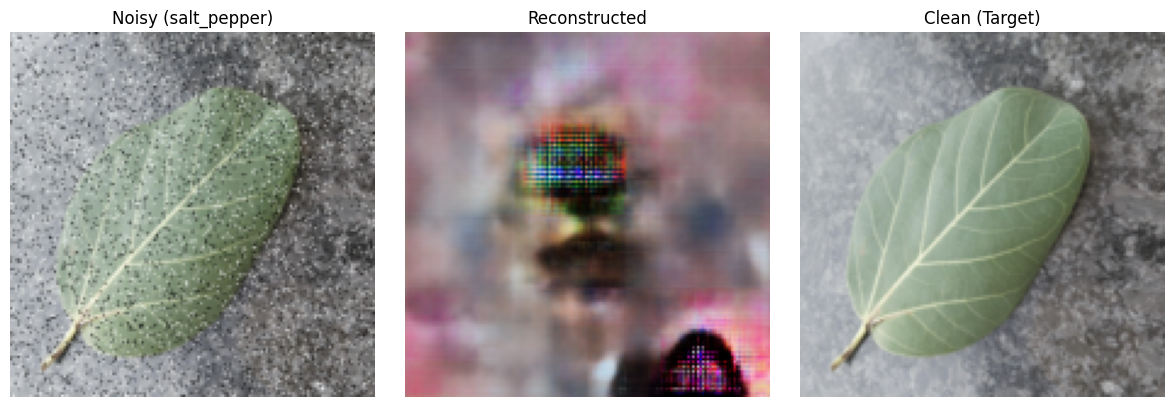

In [31]:
import matplotlib.pyplot as plt
import torch

def visualize_denoising_sample(model, dataset, device, idx=None):
    """
    Visualize a noisy → reconstructed → clean triplet from the dataset.

    Args:
        model   : Denoising model (already loaded on device)
        dataset : NoisyCleanDataset
        device  : 'cuda' or 'cpu'
        idx     : Index of sample (random if None)
    """
    model.eval()

    if idx is None:
        idx = torch.randint(0, len(dataset), (1,)).item()

    noisy, clean, noise_type = dataset[idx]

    noisy_tensor = noisy.unsqueeze(0).to(device)
    clean_tensor = clean.unsqueeze(0).to(device)

    with torch.no_grad():
        recon = model(noisy_tensor)

    noisy_np = noisy_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
    clean_np = clean_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
    recon_np = recon.squeeze(0).cpu().permute(1, 2, 0).numpy()

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(noisy_np)
    axs[0].set_title(f"Noisy ({noise_type})")
    axs[0].axis("off")

    axs[1].imshow(recon_np)
    axs[1].set_title("Reconstructed")
    axs[1].axis("off")

    axs[2].imshow(clean_np)
    axs[2].set_title("Clean (Target)")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

visualize_denoising_sample(model, train_ds, device)

In [34]:
def load_finetuned_resnet50(
    num_classes=17,
    diff_url="https://raw.githubusercontent.com/AmirHossienAfshar/cv-noise-denoise/master/saved_models/resnet50_finetune_diff.pth",
    local_diff_path="resnet50_finetine_diff.pth",
    base_model_path=None,
    device=None
):
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    if base_model_path and os.path.exists(base_model_path):
        model = resnet50(weights=None)
        checkpoint = torch.load(base_model_path, map_location=device)
        model.load_state_dict(checkpoint)
    else:
        model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    if not os.path.exists(local_diff_path):
        urlretrieve(diff_url, local_diff_path)
    diff_state = torch.load(local_diff_path, map_location=device)
    model_state = model.state_dict()
    model_state.update(diff_state)
    model.load_state_dict(model_state)

    return model.to(device)

device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = load_finetuned_resnet50(device=device)
encoder    = nn.Sequential(*list(base_model.children())[:-2])  # drop pool & fc
for p in encoder.parameters():
    p.requires_grad = False

class EncoderToLatent(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc   = nn.Linear(2048, latent_dim)

    def forward(self, x):
        x = self.pool(x)             # [B,2048,1,1]
        x = torch.flatten(x,1)       # [B,2048]
        return self.fc(x)            # [B,latent_dim]

bridge = EncoderToLatent(latent_dim=128).to(device)


class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim=128, C=3, H=224, W=224):
        super().__init__()
        # project z → small feature map
        self.fc = nn.Linear(latent_dim, 512 * 7 * 7)
        # upsample to (C,H,W)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # 14×14
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 28×28
            nn.ReLU(True),
            nn.ConvTranspose2d(128,  64, kernel_size=4, stride=2, padding=1),  # 56×56
            nn.ReLU(True),
            nn.ConvTranspose2d( 64,  32, kernel_size=4, stride=2, padding=1),  #112×112
            nn.ReLU(True),
            nn.ConvTranspose2d( 32,   C, kernel_size=4, stride=2, padding=1),  #224×224
            nn.Sigmoid()  # ensure outputs in [0,1]
        )

    def forward(self, z):
        x = self.fc(z)                         # [B, 512*7*7]
        x = x.view(-1, 512, 7, 7)              # [B,512,7,7]
        return self.deconv(x)                 # [B,C,H,W]

latent_dim = bridge.fc.out_features         # 128
C, H_dec, W_dec = 3, 224, 224

decoder = SimpleDecoder(latent_dim=latent_dim, C=C, H=H_dec, W=W_dec).to(device)


class DenoisingModel(nn.Module):
    def __init__(self, encoder, bridge, decoder):
        super().__init__()
        self.encoder = encoder
        self.bridge  = bridge
        self.decoder = decoder

    def forward(self, x):
        feats = self.encoder(x)
        z     = self.bridge(feats)
        recon = self.decoder(z)
        return recon

model_new = DenoisingModel(encoder, bridge, decoder).to(device)


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

class NoisyCleanDataset(Dataset):
    def __init__(self, clean_dir, noise_dirs, transform=None):
        """
        Args:
            clean_dir  (str): Path to clean images folder
            noise_dirs (dict): Dictionary of noise_type -> path
            transform (callable, optional): Transform to apply to images
        """
        self.clean_dir = clean_dir
        self.noise_dirs = noise_dirs
        self.transform = transform

        # Collect all pairs (noisy_path, clean_path, noise_type)
        self.pairs = self._build_pairs()

    def _build_pairs(self):
        """Match noisy images from all noise folders with corresponding clean images"""
        pairs = []
        clean_images = {f: os.path.join(self.clean_dir, f)
                        for f in os.listdir(self.clean_dir) if f.endswith('.png')}

        for noise_type, noise_dir in self.noise_dirs.items():
            noisy_files = [f for f in os.listdir(noise_dir) if f.endswith('.png')]
            for fname in noisy_files:
                if fname in clean_images:  # Match by filename
                    pairs.append({
                        "noisy": os.path.join(noise_dir, fname),
                        "clean": clean_images[fname],
                        "type": noise_type
                    })

        return pairs

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        pair = self.pairs[idx]

        noisy_img = Image.open(pair["noisy"]).convert("RGB")
        clean_img = Image.open(pair["clean"]).convert("RGB")

        if self.transform:
            noisy_img = self.transform(noisy_img)
            clean_img = self.transform(clean_img)

        return noisy_img, clean_img, pair["type"]

train_ds = NoisyCleanDataset(CLEAN_DIR, NOISE_DIRS, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)

noisy, clean, noise_type = next(iter(train_loader))
print("Noisy:", noisy.shape, "Clean:", clean.shape, "Type:", noise_type)

Noisy: torch.Size([64, 3, 224, 224]) Clean: torch.Size([64, 3, 224, 224]) Type: ('salt_pepper_speckle_uniform', 'speckle_uniform', 'salt_pepper', 'salt_pepper', 'speckle', 'salt_pepper_speckle', 'speckle', 'poisson', 'speckle', 'poisson_uniform', 'salt_pepper', 'salt_pepper_speckle_uniform', 'speckle_uniform', 'salt_pepper_speckle', 'gaussian_speckle', 'salt_pepper_speckle', 'gaussian_speckle', 'poisson_uniform', 'poisson_uniform', 'gaussian_salt_pepper', 'speckle_uniform', 'salt_pepper_uniform', 'uniform', 'salt_pepper_speckle', 'gaussian_salt_pepper_speckle', 'gaussian_poisson_uniform', 'speckle', 'gaussian_poisson_uniform', 'poisson_speckle', 'gaussian_uniform', 'poisson', 'gaussian_salt_pepper_speckle', 'gaussian_poisson_uniform', 'gaussian_salt_pepper_speckle', 'gaussian_poisson_uniform', 'salt_pepper', 'salt_pepper_speckle_uniform', 'gaussian_poisson_uniform', 'gaussian_salt_pepper_speckle', 'gaussian_poisson_uniform', 'poisson_speckle', 'poisson', 'speckle_uniform', 'gaussian_po

In [41]:
criterion = nn.L1Loss()

opt = optim.Adam(model_new.parameters(), lr=1e-4)
train_ds = NoisyCleanDataset(CLEAN_DIR, NOISE_DIRS, transform=transform)

batch_size = 64   # Adjust if OOM
num_workers = 2   # For Colab, safe value
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# 2) Quick sanity check
noisy, clean, noise_type = next(iter(train_loader))
print("Sanity check — Batch shapes:")
print("Noisy:", noisy.shape, "Clean:", clean.shape, "Noise type sample:", noise_type[0])

# 3) Training loop with logs
epochs = 70
log_interval = 100  # print every 100 steps

import math
import torch

# Path to save the best model
CHECKPOINT_PATH = "best_denoiser.pth"

best_loss = math.inf  # initialize to +∞

for ep in range(1, epochs + 1):
    model_new.train()
    total_loss = 0.0

    print(f"\n=== Starting Epoch {ep}/{epochs} ===")
    print(f"Total steps: {len(train_loader)}")

    for step, (noisy, clean, noise_type) in enumerate(train_loader, start=1):
        noisy, clean = noisy.to(device), clean.to(device)

        # Forward + backward
        recon = model_new(noisy)
        loss = criterion(recon, clean)

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.item() * noisy.size(0)

        if step % log_interval == 0 or step == len(train_loader):
            print(
                f"[Epoch {ep}/{epochs} | Step {step}/{len(train_loader)}] "
                f"Batch Loss: {loss.item():.4f} | Noise: {noise_type[0]}"
            )

    # compute avg loss for this epoch
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {ep} — Avg Loss: {avg_loss:.4f}")

    # check for improvement
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model_new.state_dict(), CHECKPOINT_PATH)
        print(f"New best model saved (loss {best_loss:.4f}) → {CHECKPOINT_PATH}")

Sanity check — Batch shapes:
Noisy: torch.Size([64, 3, 224, 224]) Clean: torch.Size([64, 3, 224, 224]) Noise type sample: poisson_speckle

=== Starting Epoch 1/70 ===
Total steps: 54
[Epoch 1/70 | Step 54/54] Batch Loss: 0.1458 | Noise: gaussian_salt_pepper
Epoch 1 — Avg Loss: 0.1624
New best model saved (loss 0.1624) → best_denoiser.pth

=== Starting Epoch 2/70 ===
Total steps: 54
[Epoch 2/70 | Step 54/54] Batch Loss: 0.1426 | Noise: gaussian
Epoch 2 — Avg Loss: 0.1522
New best model saved (loss 0.1522) → best_denoiser.pth

=== Starting Epoch 3/70 ===
Total steps: 54
[Epoch 3/70 | Step 54/54] Batch Loss: 0.1541 | Noise: speckle_uniform
Epoch 3 — Avg Loss: 0.1457
New best model saved (loss 0.1457) → best_denoiser.pth

=== Starting Epoch 4/70 ===
Total steps: 54
[Epoch 4/70 | Step 54/54] Batch Loss: 0.1369 | Noise: uniform
Epoch 4 — Avg Loss: 0.1415
New best model saved (loss 0.1415) → best_denoiser.pth

=== Starting Epoch 5/70 ===
Total steps: 54
[Epoch 5/70 | Step 54/54] Batch Loss: 0

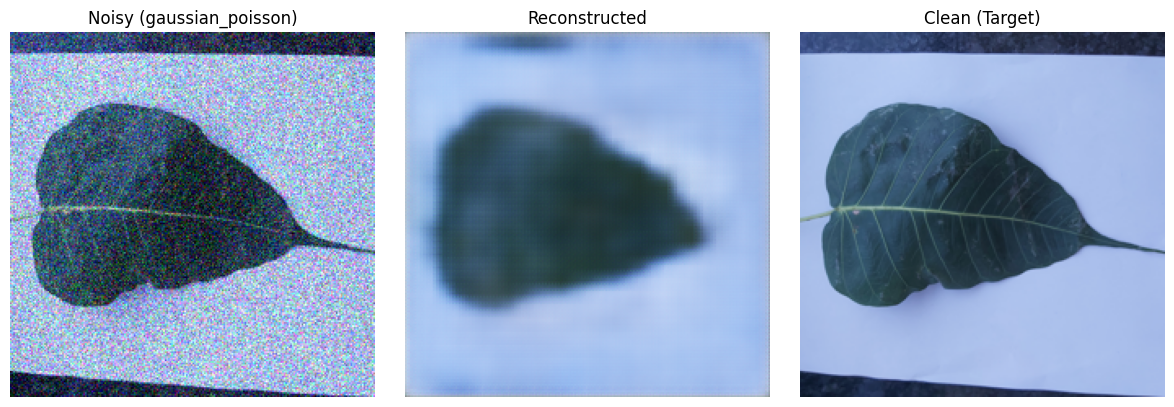

In [49]:
visualize_denoising_sample(model_new, train_ds, device)


In [53]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image

# --- 1) SSIM implementation ---
def gaussian_window(window_size, sigma):
    coords = torch.arange(window_size, dtype=torch.float32) - window_size//2
    g = torch.exp(-(coords**2)/(2*sigma**2))
    g = g / g.sum()
    return g.unsqueeze(1) * g.unsqueeze(0)

def create_window(window_size, channel, device):
    _1D = gaussian_window(window_size, sigma=1.5).to(device)
    _2D = _1D.unsqueeze(0).unsqueeze(0)
    return _2D.expand(channel, 1, window_size, window_size).contiguous()

def ssim(img1, img2, window, window_size, channel, size_average=True):
    mu1 = F.conv2d(img1, window, padding=window_size//2, groups=channel)
    mu2 = F.conv2d(img2, window, padding=window_size//2, groups=channel)
    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding=window_size//2, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding=window_size//2, groups=channel) - mu2_sq
    sigma12   = F.conv2d(img1*img2, window, padding=window_size//2, groups=channel) - mu1_mu2

    C1, C2 = 0.01**2, 0.03**2
    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2)) / ((mu1_sq+mu2_sq + C1)*(sigma1_sq+sigma2_sq + C2))
    return ssim_map.mean() if size_average else ssim_map

class SSIMLoss(nn.Module):
    def __init__(self, window_size=11, channel=3, device='cuda'):
        super().__init__()
        self.window = create_window(window_size, channel, device)
        self.window_size = window_size
        self.channel = channel

    def forward(self, img1, img2):
        return 1 - ssim(img1, img2, self.window, self.window_size, self.channel)

# --- 2) Data augmentation & DataLoader setup ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor()
])

train_ds = NoisyCleanDataset(CLEAN_DIR, NOISE_DIRS, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)

# --- 3) Reload the best model and unfreeze last ResNet block ---
model_new.load_state_dict(torch.load("best_denoiser.pth", map_location=device))
model_new.to(device)

# Freeze all parameters first
for param in model_new.parameters():
    param.requires_grad = False

# Unfreeze only encoder.layer4 (index 7 in your Sequential)
for param in model_new.encoder[7].parameters():
    param.requires_grad = True

# Unfreeze the bridge
for param in model_new.bridge.parameters():
    param.requires_grad = True

# Unfreeze the entire decoder
for param in model_new.decoder.parameters():
    param.requires_grad = True

# Verify which parameters are trainable
trainable = [name for name, p in model_new.named_parameters() if p.requires_grad]
print("Trainable parameters:\n", "\n".join(trainable))

optimizer = optim.Adam([
    {'params': model_new.encoder[7].parameters(),                                       'lr': 1e-5},
    {'params': list(model_new.encoder[:7].parameters()) +
                list(model_new.bridge.parameters()) +
                list(model_new.decoder.parameters()),                                   'lr': 1e-4}
])


Trainable parameters:
 encoder.7.0.conv1.weight
encoder.7.0.bn1.weight
encoder.7.0.bn1.bias
encoder.7.0.conv2.weight
encoder.7.0.bn2.weight
encoder.7.0.bn2.bias
encoder.7.0.conv3.weight
encoder.7.0.bn3.weight
encoder.7.0.bn3.bias
encoder.7.0.downsample.0.weight
encoder.7.0.downsample.1.weight
encoder.7.0.downsample.1.bias
encoder.7.1.conv1.weight
encoder.7.1.bn1.weight
encoder.7.1.bn1.bias
encoder.7.1.conv2.weight
encoder.7.1.bn2.weight
encoder.7.1.bn2.bias
encoder.7.1.conv3.weight
encoder.7.1.bn3.weight
encoder.7.1.bn3.bias
encoder.7.2.conv1.weight
encoder.7.2.bn1.weight
encoder.7.2.bn1.bias
encoder.7.2.conv2.weight
encoder.7.2.bn2.weight
encoder.7.2.bn2.bias
encoder.7.2.conv3.weight
encoder.7.2.bn3.weight
encoder.7.2.bn3.bias
bridge.fc.weight
bridge.fc.bias
decoder.fc.weight
decoder.fc.bias
decoder.deconv.0.weight
decoder.deconv.0.bias
decoder.deconv.2.weight
decoder.deconv.2.bias
decoder.deconv.4.weight
decoder.deconv.4.bias
decoder.deconv.6.weight
decoder.deconv.6.bias
decoder.deco

In [54]:
best_loss = math.inf
checkpoint_path = "best_denoiser_finetuned.pth"
epochs = 30
log_interval = 100  # print every 100 batches

for ep in range(1, epochs + 1):
    model_new.train()
    total_loss = 0.0

    print(f"\n=== Starting Epoch {ep}/{epochs} ===")
    print(f"Total steps: {len(train_loader)}")

    for step, (noisy, clean, noise_type) in enumerate(train_loader, start=1):
        noisy, clean = noisy.to(device), clean.to(device)
        recon = model_new(noisy)

        loss_l1   = l1_loss(recon, clean)
        loss_ssim = ssim_loss(recon, clean)
        loss      = loss_l1 + 0.1 * loss_ssim

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * noisy.size(0)

        # --- Batch-level logging ---
        if step % log_interval == 0 or step == len(train_loader):
            print(
                f"[Epoch {ep}/{epochs} | Step {step}/{len(train_loader)}] "
                f"Batch Loss: {loss.item():.4f} | Noise: {noise_type[0]}"
            )

    # Epoch summary
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {ep} — Avg Loss: {avg_loss:.4f}")

    # Checkpoint if improved
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model_new.state_dict(), checkpoint_path)
        print(f"New best model saved: loss {best_loss:.4f} → {checkpoint_path}")


=== Starting Epoch 1/30 ===
Total steps: 54
[Epoch 1/30 | Step 54/54] Batch Loss: 0.1947 | Noise: gaussian
Epoch 1 — Avg Loss: 0.2069
New best model saved: loss 0.2069 → best_denoiser_finetuned.pth

=== Starting Epoch 2/30 ===
Total steps: 54
[Epoch 2/30 | Step 54/54] Batch Loss: 0.1990 | Noise: salt_pepper_speckle
Epoch 2 — Avg Loss: 0.2020
New best model saved: loss 0.2020 → best_denoiser_finetuned.pth

=== Starting Epoch 3/30 ===
Total steps: 54
[Epoch 3/30 | Step 54/54] Batch Loss: 0.2027 | Noise: salt_pepper
Epoch 3 — Avg Loss: 0.2000
New best model saved: loss 0.2000 → best_denoiser_finetuned.pth

=== Starting Epoch 4/30 ===
Total steps: 54
[Epoch 4/30 | Step 54/54] Batch Loss: 0.2040 | Noise: gaussian_poisson_uniform
Epoch 4 — Avg Loss: 0.1997
New best model saved: loss 0.1997 → best_denoiser_finetuned.pth

=== Starting Epoch 5/30 ===
Total steps: 54
[Epoch 5/30 | Step 54/54] Batch Loss: 0.1959 | Noise: salt_pepper_uniform
Epoch 5 — Avg Loss: 0.1986
New best model saved: loss 0

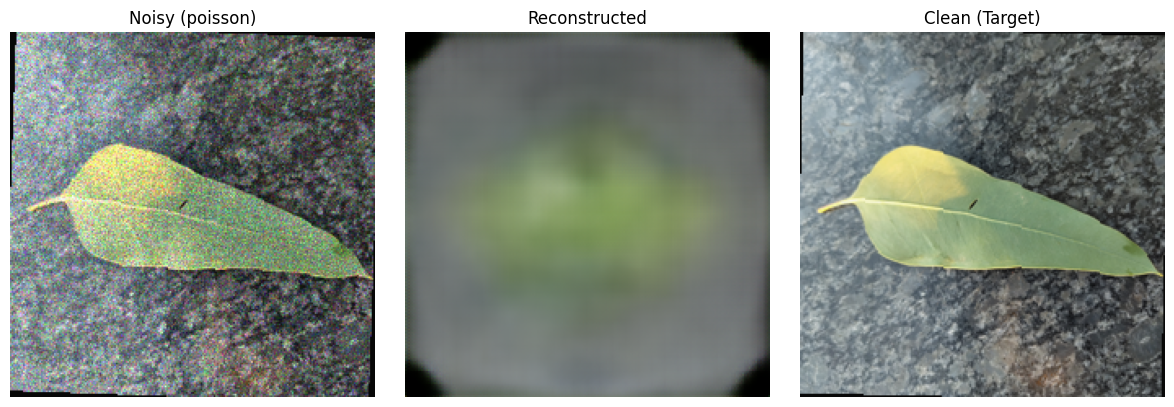

In [63]:
visualize_denoising_sample(model_new, train_ds, device)
